In [1]:
# Importing packages
import pandas as pd #importing pandas package
import numpy as np #importing numpy package
import matplotlib.pyplot as plt#importing graph package using matplot
import seaborn as sns #importing graph package using seaborn

In [2]:
# Attach DataSet using pandas package
wbcd = pd.read_csv("wbcd.csv")
wbcd.head() # To show inside the data and head() use for top 5 row in data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [3]:
del wbcd["id"] # Delete id column
wbcd.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [4]:
wbcd.isnull().sum() # Checking missing value in the data

diagnosis            0
radius_mean          0
texture_mean         0
perimeter_mean       0
area_mean            0
smoothness_mean      0
compactness_mean     0
concavity_mean       0
points_mean          0
symmetry_mean        0
dimension_mean       0
radius_se            0
texture_se           0
perimeter_se         0
area_se              0
smoothness_se        0
compactness_se       0
concavity_se         0
points_se            0
symmetry_se          0
dimension_se         0
radius_worst         0
texture_worst        0
perimeter_worst      0
area_worst           0
smoothness_worst     0
compactness_worst    0
concavity_worst      0
points_worst         0
symmetry_worst       0
dimension_worst      0
dtype: int64

In [7]:
# This function used to remove detect the outliers
def outlier_detect(df):
    for i in df.describe().columns:
        Q1=df.describe().at['25%',i]
        Q3=df.describe().at['75%',i]
        IQR=Q3-Q1
        LTV=Q1-1.5*IQR
        UTV=Q3+1.5*IQR
        df[i]=df[i].mask(df[i]<LTV,LTV)
        df[i]=df[i].mask(df[i]>UTV,UTV)
    return df
wbcd = outlier_detect(wbcd) # Remove outliers

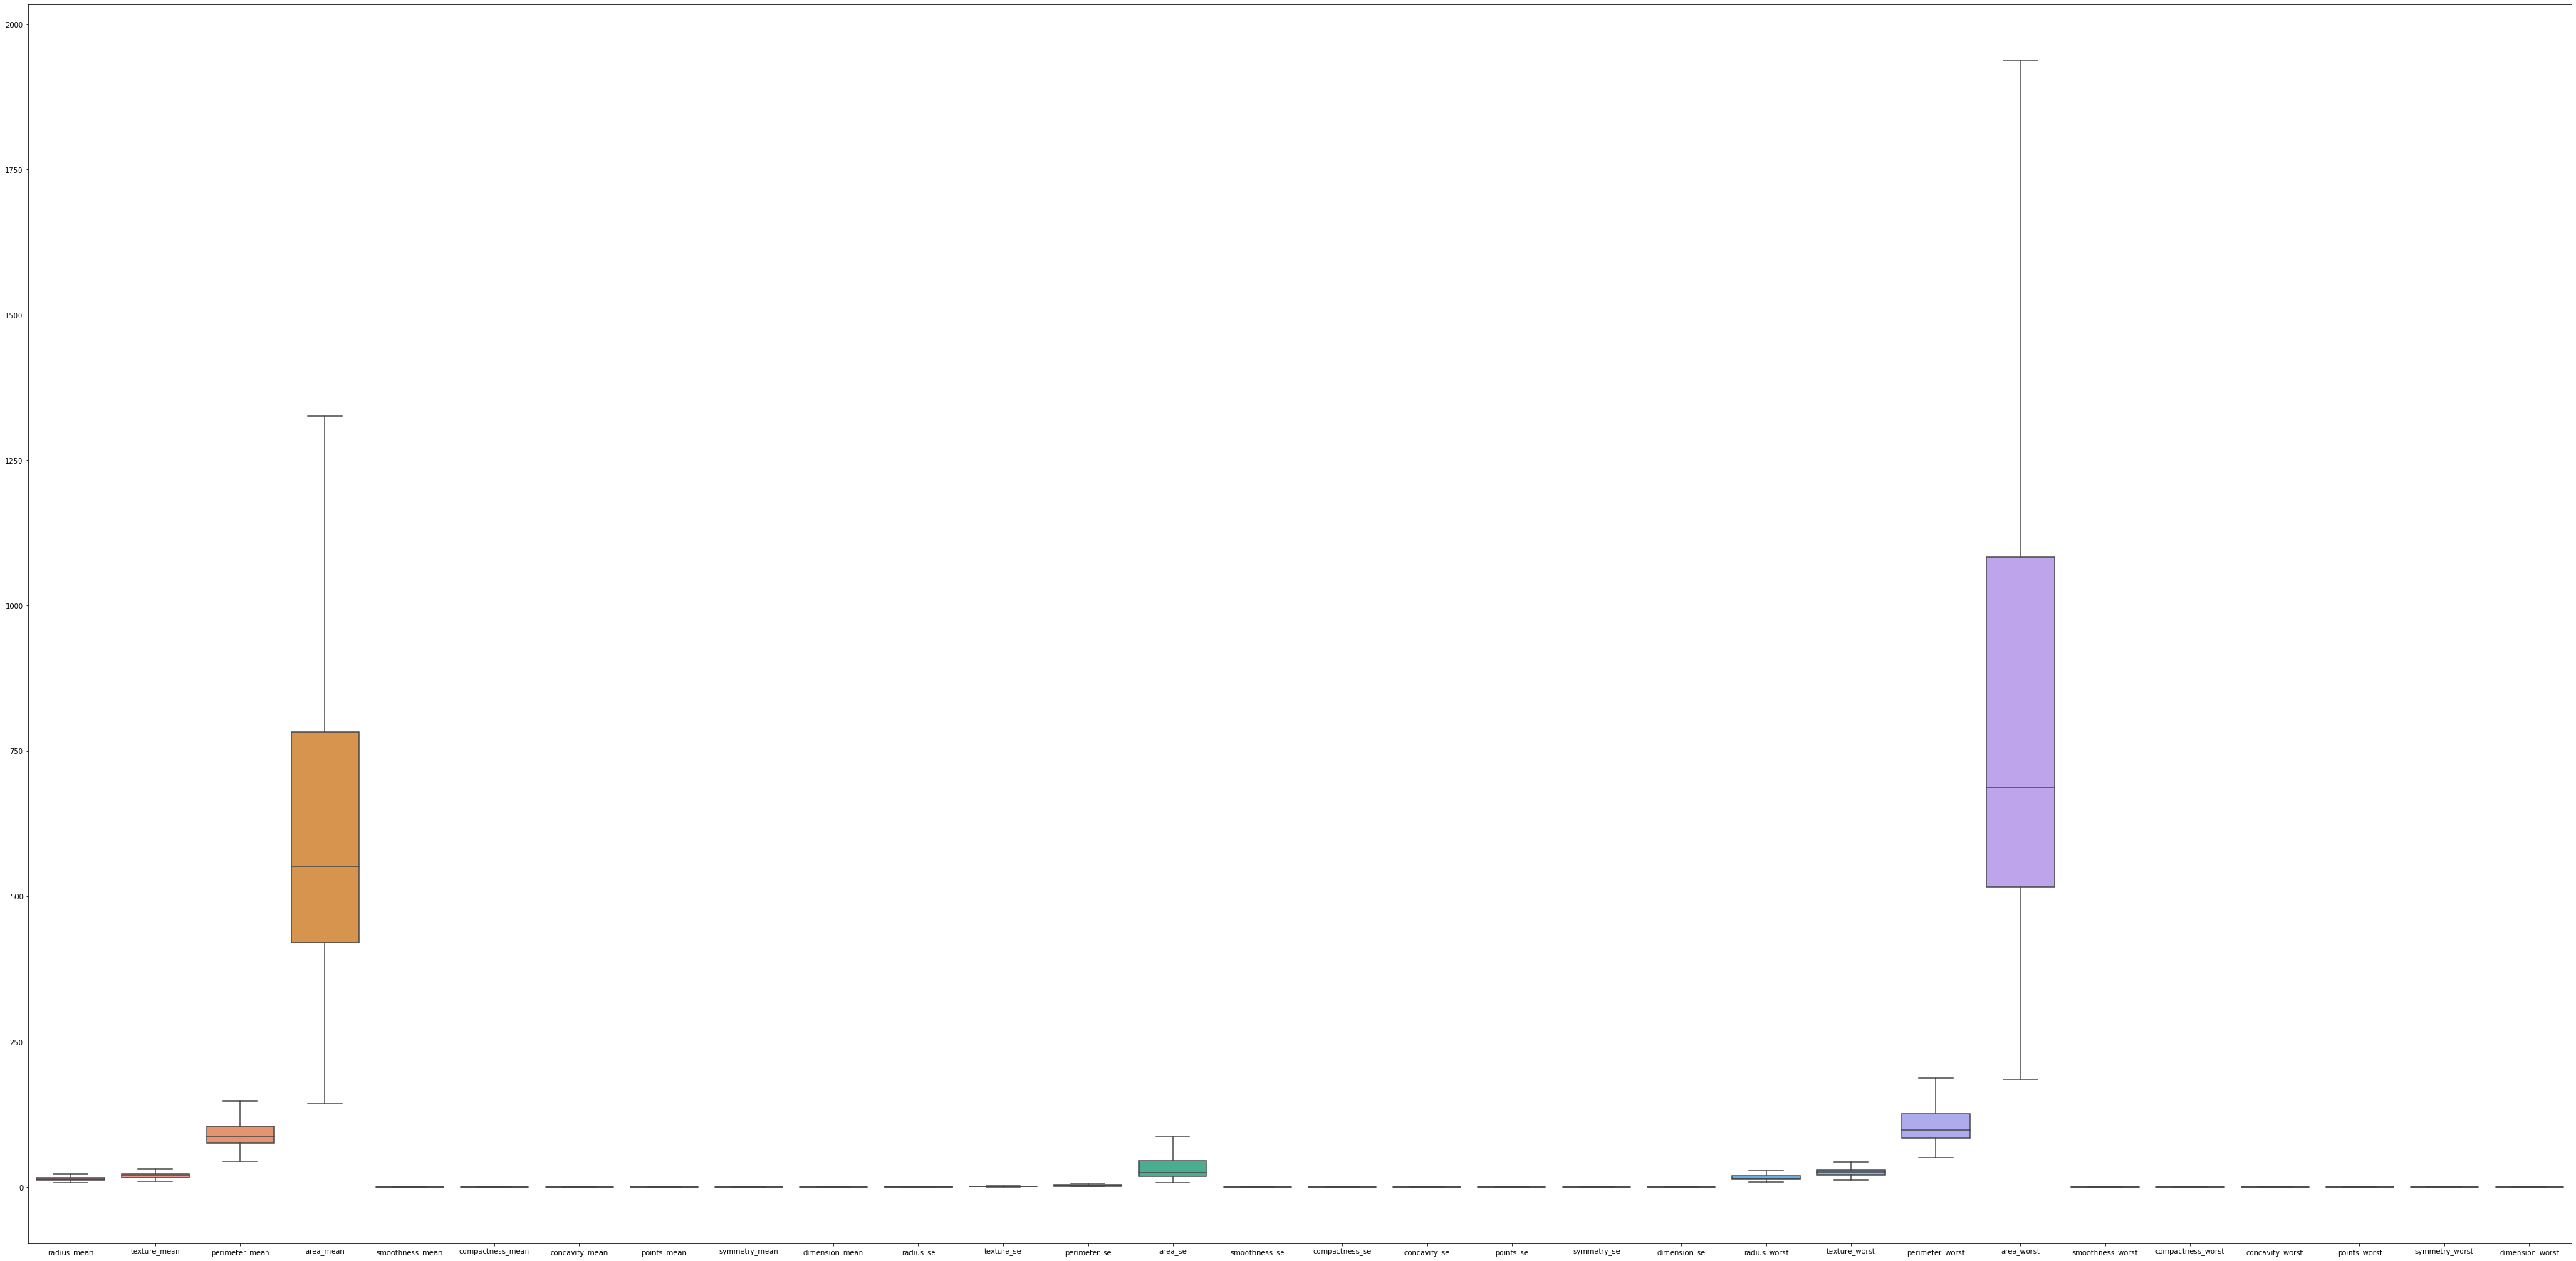

In [8]:
# Set the size graph
fig, ax = plt.subplots()
fig.set_size_inches(64,32)

sns.boxplot(data=wbcd) #Check outliers removed or not

In [9]:
#Create y Data
y = wbcd.iloc[:,0:1]
y.head()

,diagnosis
0,B
1,B
2,B
3,B
4,B


In [10]:
#Create X Data
X = wbcd.iloc[:,1:40]
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,0.06491,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,0.06340,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,0.06072,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,0.05544,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [11]:
# Normality Test on X Data
X =(X-X.min())/(X.max() -X.min())
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,0.357866,0.130509,0.338074,0.271052,0.591984,0.241015,0.141178,0.239428,0.626479,0.333102,...,0.285202,0.118069,0.267007,0.207723,0.561224,0.165611,0.158116,0.322715,0.480487,0.186406
1,0.242577,0.449963,0.245793,0.171542,0.513801,0.455553,0.226161,0.170965,0.599112,0.519278,...,0.202253,0.356164,0.203542,0.136770,0.414966,0.373895,0.243921,0.272371,0.523510,0.306459
2,0.272069,0.346725,0.261607,0.194200,0.656696,0.280348,0.107857,0.160481,0.445266,0.466829,...,0.229391,0.470320,0.215592,0.163370,0.547619,0.201631,0.135837,0.255361,0.545593,0.349713
3,0.288156,0.179206,0.281664,0.204007,0.771593,0.450296,0.164123,0.310350,0.487426,0.373741,...,0.204301,0.122309,0.190761,0.142021,0.545918,0.258330,0.110363,0.295911,0.204455,0.188318
4,0.550238,0.170441,0.519358,0.480470,0.285988,0.238769,0.120144,0.171935,0.450444,0.190344,...,0.423451,0.121005,0.395034,0.361846,0.340986,0.244155,0.173393,0.281031,0.351038,0.185670


In [13]:
# Spliting Training and Testing Train Size = 80 and Test Size = 20
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

# Importing all Classification/Supervised Algorithm Because the Output data is Categorical

In [14]:
# Importing K-Nearest Neighbors Algorithm
from sklearn.neighbors import KNeighborsClassifier

In [15]:
classifier_knn = KNeighborsClassifier(n_neighbors=5) #Building Model
classifier_knn.fit(X_train, y_train) #Fitting Model

C:\Users\mayur\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [16]:
y_pred_knn = classifier_knn.predict(X_test) #Predicting data
y_pred_knn

array(['M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'B',
       'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B',
       'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M'], dtype=object)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix #Importing confusion matrix package
cm_knn = confusion_matrix(y_test, y_pred_knn) #Confusion Matrix
cm_knn

array([[77,  0],
       [ 4, 33]], dtype=int64)

In [18]:
from sklearn.metrics import accuracy_score #Importing accuracy score package
Accuracy_Score_knn = accuracy_score(y_test, y_pred_knn) #Calculating Accuracy Score
Accuracy_Score_knn

0.9649122807017544

In [19]:
# Importing Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB

In [20]:
classifier_NB = GaussianNB() #Building Model
classifier_NB.fit(X_train,y_train) #Fitting Model

C:\Users\mayur\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [21]:
y_pred_NB = classifier_NB.predict(X_test) #Predicting data
y_pred_NB

array(['M', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B',
       'M', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M'], dtype='<U1')

In [22]:
cm_NB = confusion_matrix(y_test, y_pred_NB) #Confusion Matrix
cm_NB

array([[74,  3],
       [ 7, 30]], dtype=int64)

In [23]:
Accuracy_Score_NB = accuracy_score(y_test, y_pred_NB) #Calculating Accuracy Score
Accuracy_Score_NB

0.9122807017543859

In [32]:
# Importing Support Vector Machine Algorithm
from sklearn.svm import SVC
classifier_svm_linear = SVC(kernel = 'linear', random_state = 0) #Building Model
classifier_svm_linear.fit(X_train, y_train) #Fitting Model

C:\Users\mayur\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [33]:
y_pred_svm_linear = classifier_svm_linear.predict(X_test) #Predicting data
y_pred_svm_linear

array(['M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'B',
       'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B',
       'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M'], dtype=object)

In [34]:
cm_svm_linear = confusion_matrix(y_test, y_pred_svm_linear) #Confusion Matrix
cm_svm_linear

array([[77,  0],
       [ 2, 35]], dtype=int64)

In [35]:
Accuracy_Score_svm_linear = accuracy_score(y_test, y_pred_svm_linear) #Calculating Accuracy Score
Accuracy_Score_svm_linear

0.9824561403508771

# Using SVM Kernel 

In [36]:
classifier_svm_rbf = SVC(kernel = 'rbf', random_state = 0) #Building Model using 'rbf' = Gaussion
classifier_svm_rbf.fit(X_train, y_train) #Fitting Model

C:\Users\mayur\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mayur\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [37]:
y_pred_svm_rbf = classifier_svm_rbf.predict(X_test) #Predicting data
y_pred_svm_rbf

array(['M', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B',
       'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B'], dtype=object)

In [38]:
cm_svm_rbf = confusion_matrix(y_test, y_pred_svm_linear) #Confusion Matrix
cm_svm_rbf

array([[77,  0],
       [ 2, 35]], dtype=int64)

In [39]:
Accuracy_Score_svm_rbf = accuracy_score(y_test, y_pred_svm_rbf) #Calculating Accuracy Score
Accuracy_Score_svm_rbf

0.9298245614035088

In [40]:
classifier_svm_poly = SVC(kernel = 'poly', random_state = 0)#Building Model using 'poly' = Polynomial
classifier_svm_poly.fit(X_train, y_train) #Fiiting Model

C:\Users\mayur\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mayur\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [41]:
y_pred_svm_poly = classifier_svm_poly.predict(X_test) #Predicting data
y_pred_svm_poly

array(['M', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B'], dtype=object)

In [42]:
cm_svm_poly = confusion_matrix(y_test, y_pred_svm_poly) #Confusion Matrix
cm_svm_poly

array([[76,  1],
       [15, 22]], dtype=int64)

In [43]:
Accuracy_Score_svm_poly = accuracy_score(y_test, y_pred_svm_poly) #Calculating Accuracy Score
Accuracy_Score_svm_poly

0.8596491228070176

In [44]:
classifier_svm_sigmoid = SVC(kernel = 'sigmoid', random_state = 0)#Building Model using 'sigmoid' = Sigmoid
classifier_svm_sigmoid.fit(X_train, y_train) #Fitting Model

C:\Users\mayur\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mayur\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [45]:
y_pred_svm_sigmoid = classifier_svm_sigmoid.predict(X_test) #Predicting data
y_pred_svm_sigmoid

array(['M', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B',
       'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B'], dtype=object)

In [46]:
cm_svm_sigmoid = confusion_matrix(y_test, y_pred_svm_sigmoid) #Confusion Matrix
cm_svm_sigmoid

array([[77,  0],
       [ 8, 29]], dtype=int64)

In [47]:
Accuracy_Score_svm_sigmoid = accuracy_score(y_test, y_pred_svm_sigmoid) #Calculating Accuracy Score
Accuracy_Score_svm_sigmoid

0.9298245614035088

In [24]:
# Importing Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0) #Building Model
classifier_dt.fit(X_train, y_train) #Fitting Model

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [25]:
y_pred_dt = classifier_dt.predict(X_test)
y_pred_dt

array(['M', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B',
       'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M',
       'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B',
       'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M'], dtype=object)

In [26]:
cm_dt = confusion_matrix(y_test, y_pred_dt) #Confussion Matrix
cm_dt

array([[74,  3],
       [ 5, 32]], dtype=int64)

In [27]:
Accuracy_Score_dt = accuracy_score(y_test, y_pred_dt) #Calculating Accuracy Score
Accuracy_Score_dt

0.9298245614035088

In [28]:
# Importing Random Forest Algorithm
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0) #Building Model
classifier_rf.fit(X_train, y_train) #Fitting Model

C:\Users\mayur\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [29]:
y_pred_rf = classifier_rf.predict(X_test)
y_pred_rf

array(['M', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B',
       'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M',
       'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B',
       'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M'], dtype=object)

In [30]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_rf

array([[77,  0],
       [ 4, 33]], dtype=int64)

In [31]:
Accuracy_Score_rf = accuracy_score(y_test, y_pred_rf)
Accuracy_Score_rf

0.9649122807017544

# Print All Accuracy Score

In [48]:
print("K-Nearest Neighbors =",Accuracy_Score_knn)
print("Naive Bayes =",Accuracy_Score_NB)
print("Support Vector Machine Linear =",Accuracy_Score_svm_linear)
print("Support Vector Machine Gaussion =",Accuracy_Score_svm_rbf)
print("Support Vector Machine Polynomial =",Accuracy_Score_svm_poly)
print("Support Vector Machine Sigmoid =",Accuracy_Score_svm_sigmoid)
print("Decision Tree =",Accuracy_Score_dt)
print("Random Forest =",Accuracy_Score_rf)

K-Nearest Neighbors = 0.9649122807017544
Naive Bayes = 0.9122807017543859
Support Vector Machine Linear = 0.9824561403508771
Support Vector Machine Gaussion = 0.9298245614035088
Support Vector Machine Polynomial = 0.8596491228070176
Support Vector Machine Sigmoid = 0.9298245614035088
Decision Tree = 0.9298245614035088
Random Forest = 0.9649122807017544
